In [ ]:
## Imports the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical features based on a patient's physical examination. Blood samples are taken, and the patient goes through a brief exercise test. The "target" field denotes the presence of heart illness in the patient. It is a number (0 for no presence, 1 for presence). In general, assessing whether or not a patient has heart disease is an invasive procedure; so, if we can design a model that accurately predicts the potential of heart disease, we may be able to avoid expensive and invasive therapies.



Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease




**Read the data.**

In [ ]:
df=pd.read_csv('C:/Users/BE/Desktop/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].unique()

array([1, 0], dtype=int64)

In [ ]:
df.shape

(303, 14)

In [ ]:
df. columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Exploratory Data Cleaning 


** Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [ ]:
# CODE HERE

In [ ]:
#checking the missing value, so do we have empty values 
df.isnull().sum()

#so we do not have any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#check data types 


df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# Python has categorized all categorial data  in integer, for that reason we will change the data type in objects one

# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
#checking if it has any character by mistake in our dataset 

In [ ]:
#ca number of major vessels (0–3)
df['ca'].unique()
#the values of ca variable should be between 0-3. As we see it is an error here.

array([0, 2, 1, 3, 4], dtype=object)

In [ ]:
#to count all the values in of each category descending order

df.ca.value_counts()
#so we can see that we have 5 records that has wrong value and we need toclean those data

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [ ]:
#find the records that have the ca values=4 
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
df.loc[df['ca']==4,'ca']=np.NaN

In [ ]:
df['ca'].unique()

array([0, 2, 1, 3, nan], dtype=object)

In [ ]:
#sex : (1 = male, 0 = female)
df['sex'].unique()

array([1, 0], dtype=object)

In [ ]:
#thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
df['thal'].unique()
#there is an error, because it has even 0 values in data

array([1, 2, 3, 0], dtype=object)

In [ ]:
# #to count all the values in of each category descending order
df.thal.value_counts()
#so we can see that we have 2 records that has wrong value and we need toclean those data

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
#find the records that have the ca values=4 
df[df['thal']==0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
df.loc[df['thal']==0,'thal']=np.NaN

In [ ]:
df.thal.unique()

array([1, 2, 3, nan], dtype=object)

In [ ]:
#cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
df['cp'].unique()

array([3, 2, 1, 0], dtype=object)

In [ ]:
#trestbps (Resting Blood Pressure in mm/hg )
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [ ]:
#chol (Serum Cholesterol in mg/dl)
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [ ]:
#fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
df['fbs'].unique()

array([1, 0], dtype=object)

In [ ]:
#restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
df['restecg'].unique()

array([0, 1, 2], dtype=object)

In [ ]:
#thalach (maximum heart rate achieved)
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [ ]:
#exang (Exercise Induced Angina): [1 = yes, 0 = no]
df['exang'].unique()

array([0, 1], dtype=object)

In [ ]:
#oldpeak (ST depression induced by exercise relative to rest)
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [ ]:
#slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
df['slope'].unique()

array([0, 2, 1], dtype=object)

In [ ]:
#target: [0 = disease, 1 = no disease]
df['target'].unique()

array([1, 0], dtype=int64)

In [ ]:
#After I found the wrong values and replaced them with null values, I need to check how many values are null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [ ]:
df = df.fillna(df.median())

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# to know the basic stats
#this table it is after changes we cleaned the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
# to know the basic stats
df.describe()
#this table it is before cleaning the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
### Visualization of data  

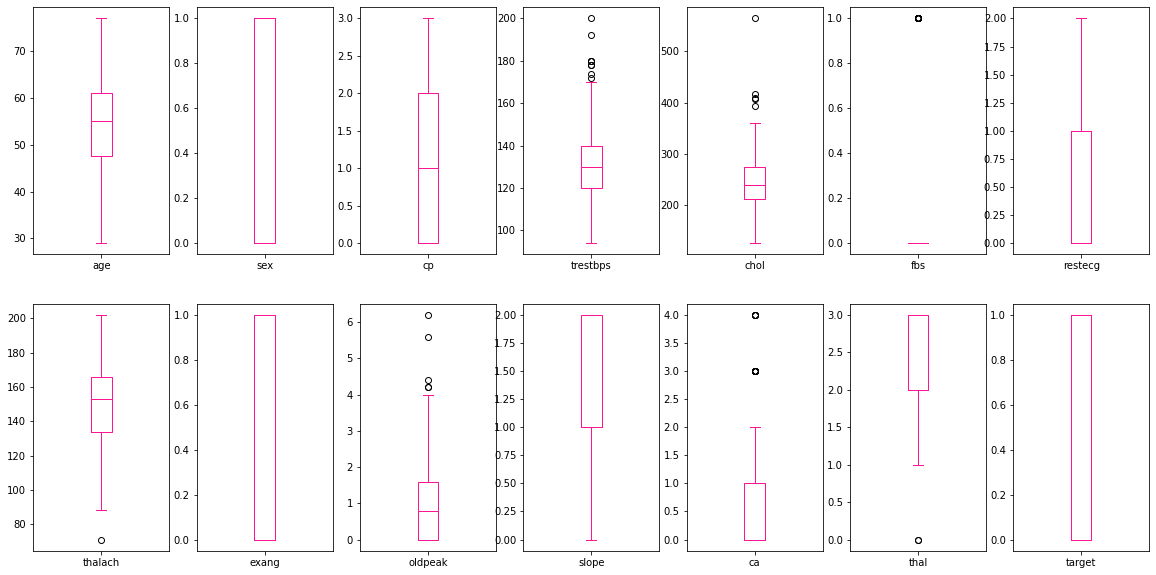

In [ ]:
#lets identify the outliers and let's move those out
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

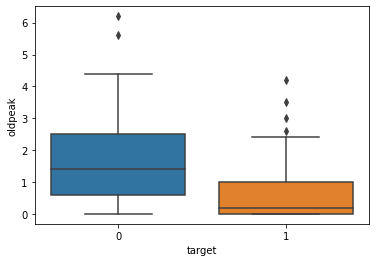

In [ ]:
sns.boxplot(x='target', y='oldpeak', data=df)

In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


### Visualization Tasks

**Create a bar plot that shows the total counts per target value.**

In [ ]:
# CODE HERE!

<AxesSubplot:xlabel='target', ylabel='count'>

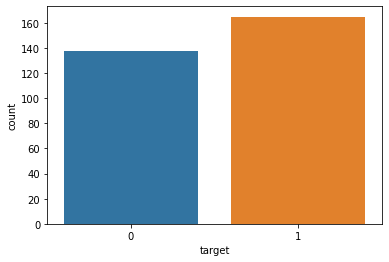

In [ ]:
sns.countplot(x='target',data=df)

Disease       165
No_disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

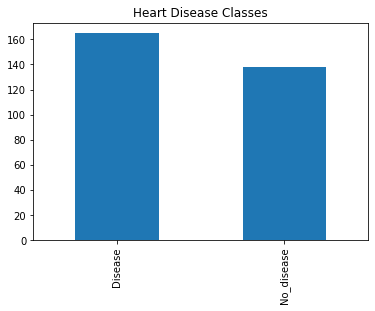

In [ ]:
print(df.target.value_counts())
df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Age Distribution')

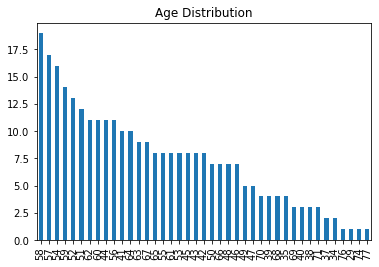

In [ ]:
# print(df.age.value_counts())
df['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

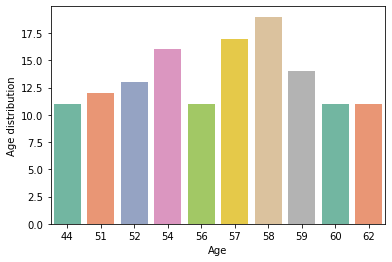

In [ ]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
            y=df.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [ ]:
# to know the youngest or oldest in age
print(min(df.age))
print(max(df.age))
print(df.age.mean())

29
77
54.366336633663366


Male      207
Female     96
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

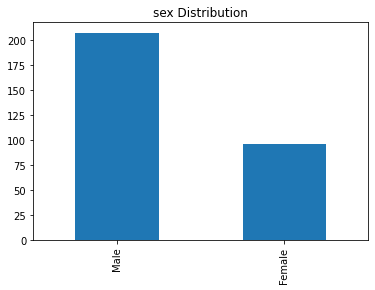

In [ ]:
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title('sex Distribution')

0                   143
atypical_angina      87
typical_angina       50
non-anginal pain     23
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

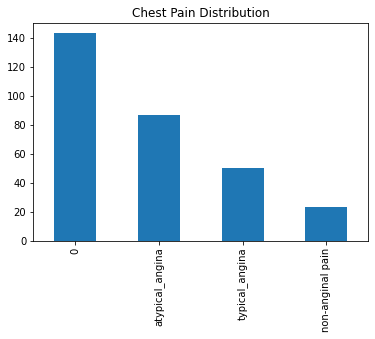

In [ ]:
print(df.cp.value_counts())
df['cp'].value_counts().plot(kind='bar').set_title('Chest Pain Distribution')

1    152
0    147
2      4
Name: restecg, dtype: int64


Text(0.5, 1.0, 'Resting ECG Distribution')

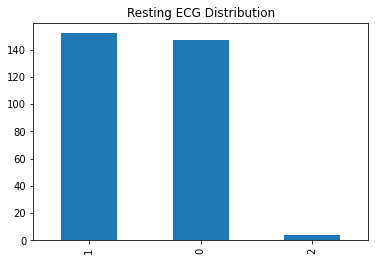

In [ ]:
print(df.restecg.value_counts())
df['restecg'].value_counts().plot(kind='bar').set_title('Resting ECG Distribution')

No     204
Yes     99
Name: exang, dtype: int64


Text(0.5, 1.0, 'Exercise Induced Angina Distribution')

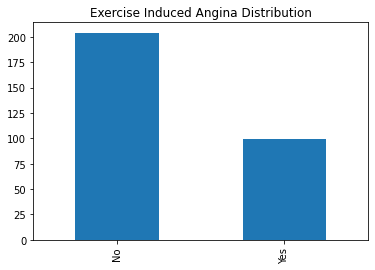

In [ ]:
print(df.exang.value_counts())
df['exang'].value_counts().plot(kind='bar').set_title('Exercise Induced Angina Distribution')

0    175
1     65
2     38
3     20
Name: ca, dtype: int64


Text(0.5, 1.0, 'NUmber of Major Vessel Distribution')

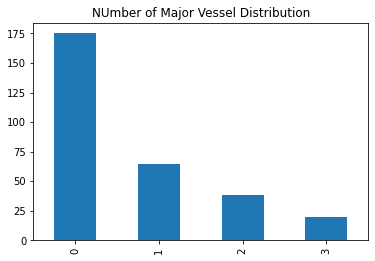

In [ ]:
print(df.ca.value_counts())
df['ca'].value_counts().plot(kind='bar').set_title('NUmber of Major Vessel Distribution')

reversable_defect    166
normal               117
fixed_defect          18
Name: thal, dtype: int64


Text(0.5, 1.0, 'thal Distribution')

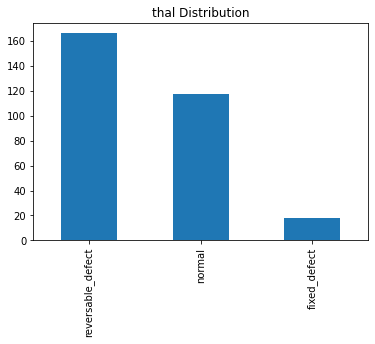

In [ ]:
print(df.thal.value_counts())
df['thal'].value_counts().plot(kind='bar').set_title('thal Distribution')

Text(0.5, 1.0, 'Disease classes according to Sex')

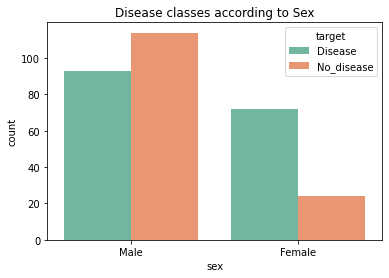

In [ ]:
sns.countplot(x='sex', hue='target', data=df, palette='Set2').set_title('Disease classes according to Sex')

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

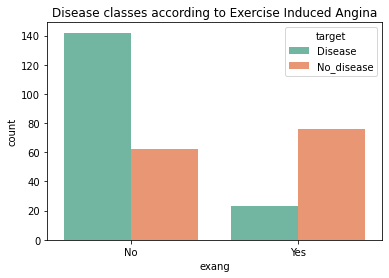

In [ ]:
sns.countplot(x='exang', hue='target', data=df, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

Text(0.5, 1.0, 'Disease classes according to fbs')

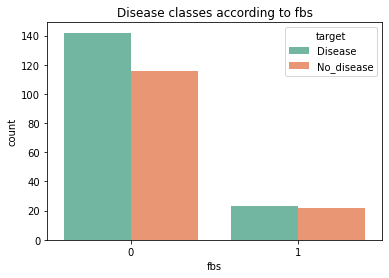

In [ ]:
sns.countplot(x='fbs', hue='target', data=df, palette='Set2').set_title('Disease classes according to fbs')


Text(0.5, 1.0, 'Disease classes according to Num Major Vessel')

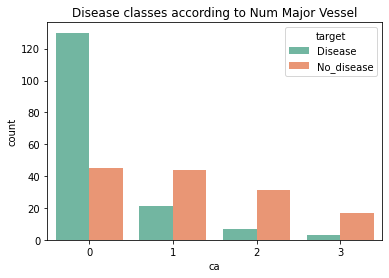

In [ ]:
sns.countplot(x='ca', hue='target', data=df, palette='Set2').set_title('Disease classes according to Num Major Vessel')


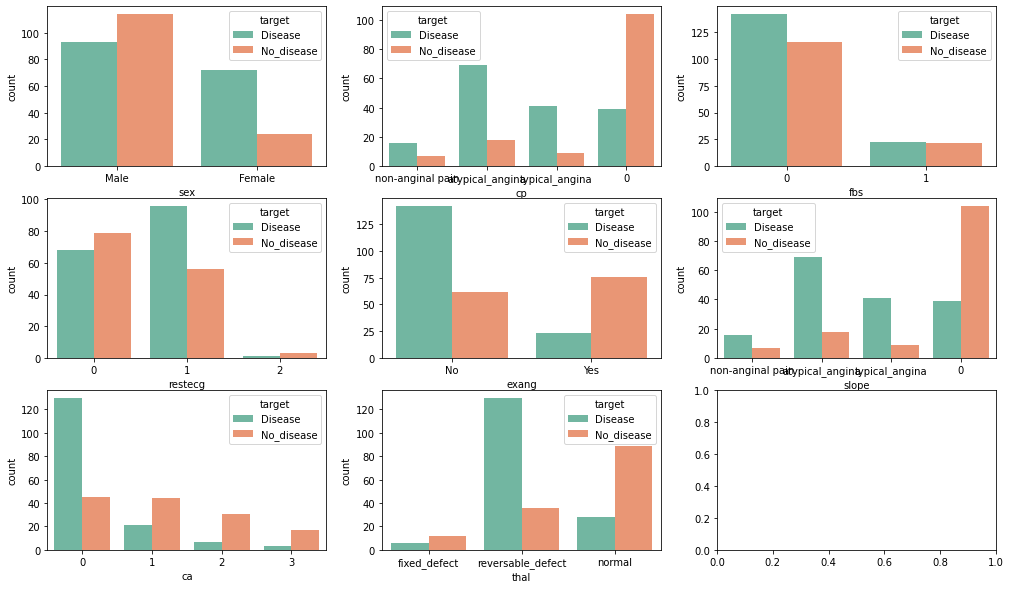

In [ ]:
# for plotting, group categorical features in cat_feat
# to create dist in 8 feature, 9th is the target, 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set2')

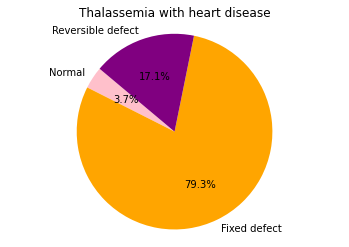

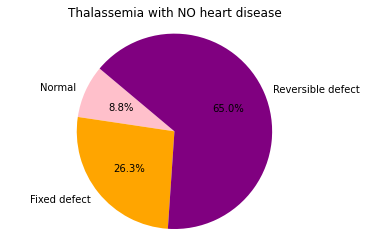

In [ ]:
# Another way of visualizing: Pie charts for thalassemia Having heart disease

labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[6, 130, 28]
colors=['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with heart disease')
plt.show()

# Not having heart disease
labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[12, 36, 89]
colors=['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with NO heart disease')
plt.show()

**Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
  

In [ ]:
# CODE HERE

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

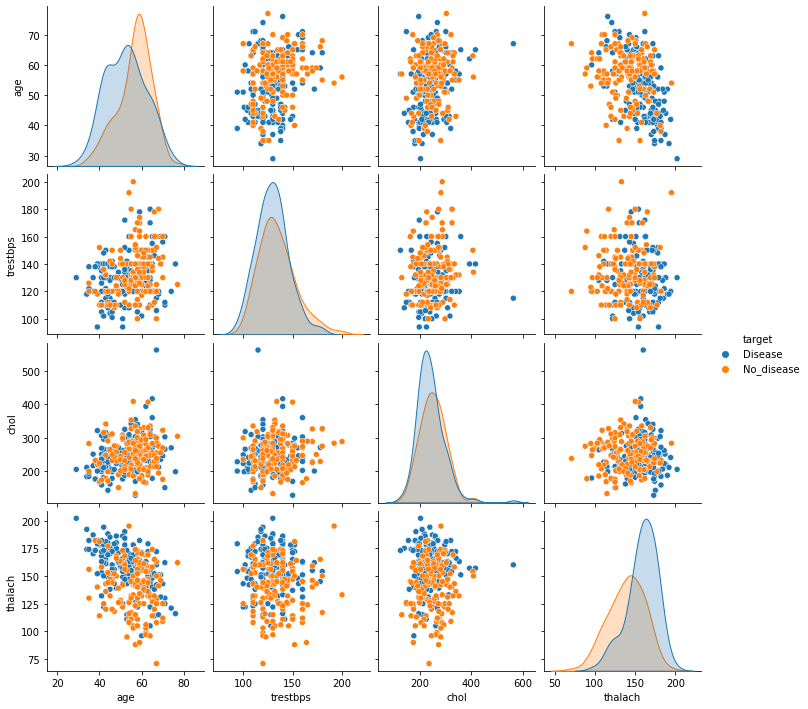

In [ ]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')


**Create a heatmap that displays the correlation between all the columns.**

In [ ]:
# CODE HERE

<AxesSubplot:>

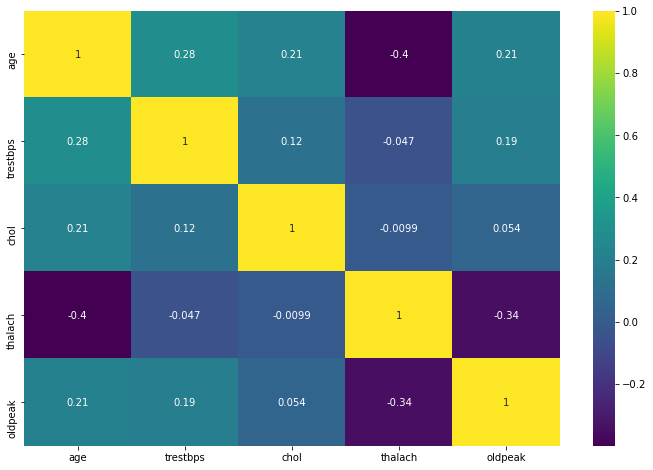

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

<AxesSubplot:>

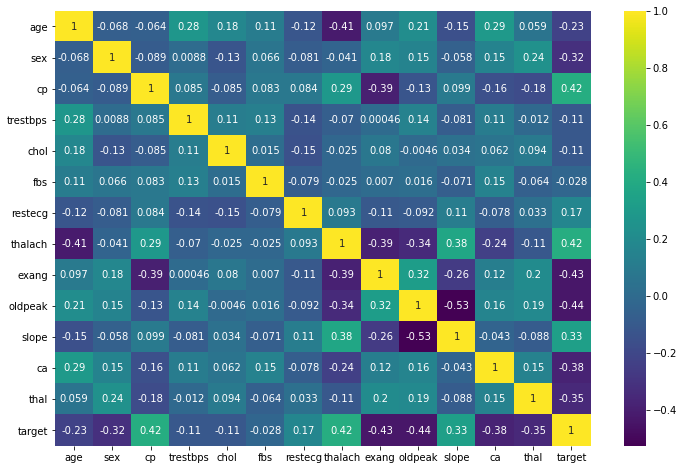

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

## Train | Test Split and Scaling

**We separate the features from the labels into 2 objects, X and y.**

In [ ]:
X = df.drop('target',axis=1)## I am just droping the values of target feature from the X values 
y = df['target']

**Perform a train test split on the data, with the test size of 20% and a random_state of 101.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search.**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV 

In [ ]:
# help(LogisticRegressionCV)

In [ ]:
log_model = LogisticRegressionCV()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

**TASK: Report back your search's optimal parameters, specifically the C value.** 

In [ ]:
log_model.C_

array([0.35938137])

In [ ]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

**Report back the model's coefficients.**

In [ ]:
log_model.coef_

array([[-0.00392392, -0.61067591,  0.74846746, -0.2471924 , -0.2732495 ,
         0.00474137,  0.3130535 ,  0.42889048, -0.5282878 , -0.57663662,
         0.32677832, -0.60836681, -0.43501586]])

** Create a visualization**

In [ ]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [ ]:
coefs = coefs.sort_values()

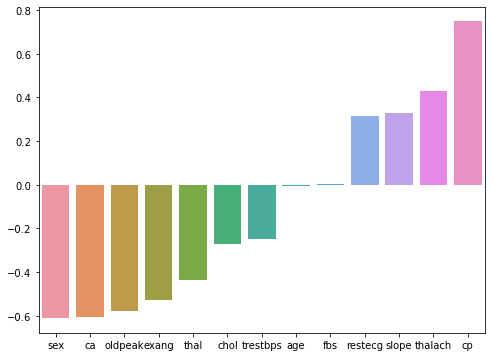

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=coefs.index,y=coefs.values);

---------

## Model Performance Evaluation

**Check the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[22,  8],
       [ 2, 25]], dtype=int64)

In [ ]:
# CODE HERE

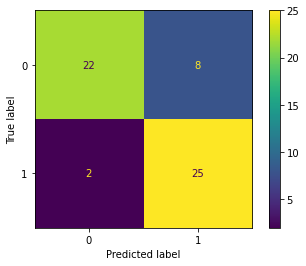

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [ ]:
# CODE HERE

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.76      0.93      0.83        27

    accuracy                           0.82        57
   macro avg       0.84      0.83      0.82        57
weighted avg       0.84      0.82      0.82        57



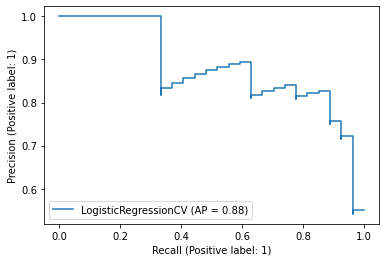

In [ ]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve


plot_precision_recall_curve(log_model,scaled_X_test,y_test)


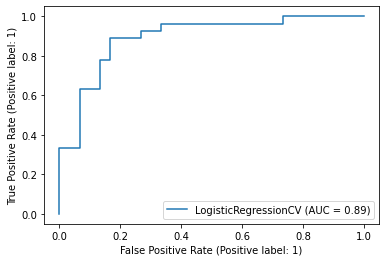

In [ ]:
plot_roc_curve(log_model,scaled_X_test,y_test)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.86      0.87      0.86        29
weighted avg       0.87      0.86      0.86        29



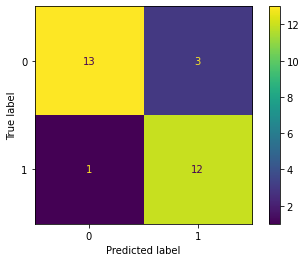

In [ ]:
#improvement of the performance of the model

#try to remove some features 
X = df.drop( columns=['target'],axis=1)## I am just droping the values of some feature from the X values 
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegressionCV 
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
y_pred = log_model.predict(scaled_X_test)
plot_confusion_matrix(log_model,scaled_X_test,y_test)
print(classification_report(y_test,y_pred))




### Random forest algorithm

In [ ]:
X = df.drop('target',axis=1)## I am just droping the values of target feature from the X values 
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Use 400 random trees
model = RandomForestClassifier(n_estimators=400,max_features='auto',random_state=101)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=101)

In [ ]:
preds = model.predict(X_test)

## Model Performance Evaluation

**Check the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,preds)

array([[34, 10],
       [ 5, 42]], dtype=int64)

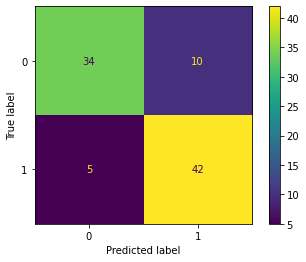

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
# To see the importance of the features

In [ ]:
model.feature_importances_

array([0.08963561, 0.03345006, 0.14967397, 0.07415565, 0.08708474,
       0.0121924 , 0.0220047 , 0.10416685, 0.04604203, 0.12813473,
       0.0511715 , 0.10792218, 0.09436558])

In [ ]:

#### To see if we increase the number of tress, it has any impact in the performance or not 

test_error = []

for n in range(1,1000):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

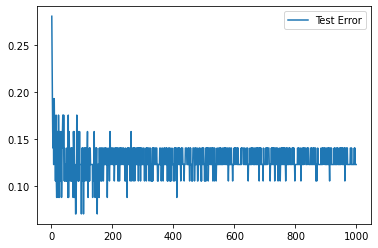

In [ ]:
plt.plot(range(1,1000),test_error,label='Test Error')
plt.legend()

#### TO FIND THE BEST FIT FOR THE PERFOMANCE USING 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators=[100,128,150,200,300,400,500]
max_features= [2,3,4,5,6,7,8,9,10,11,12,13]
bootstrap = [True,False]
oob_score = [True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [ ]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

C:\Users\BE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\BE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\BE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\BE\anaconda3\lib\site-pack

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13],
                         'n_estimators': [100, 128, 150, 200, 300, 400, 500],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [ ]:
# Find the accuracy with the best fit model 
model = RandomForestClassifier(n_estimators=100,max_features='2',bootstrap='True',oob_score= 'True')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,preds)

array([[34, 10],
       [ 5, 42]], dtype=int64)

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_

0.8018867924528302

In [ ]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

True

In [ ]:
# change the number of max features =int to see if has any change in the performance
model = RandomForestClassifier(n_estimators=1000,max_features='int',bootstrap='True',oob_score= 'True')

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

confusion_matrix(y_test,preds)

predictions = grid.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
# change the number of max features =int to see if has any change in the performance
model = RandomForestClassifier(n_estimators=400,max_features='log2',bootstrap='True',oob_score= 'True')
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score
confusion_matrix(y_test,preds)
predictions = grid.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
#try to remove some features 
X = df.drop( columns=['target','slope','sex', 'exang', 'chol','trestbps', 'restecg', 'fbs'],axis=1)## I am just droping the values of some feature from the X values 
y = df['target']

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



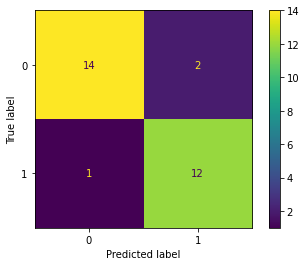

In [ ]:
#I have reduced even the test and train split in 10% and 90%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
from sklearn.ensemble import RandomForestClassifier

# Use 400 random trees
model = RandomForestClassifier(n_estimators=400,max_features='auto',random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test,preds))

#after removing some features and test_site=0.1 the accuracy rate is 90%